## Variant of the Interactive Race Model that introduces variability in mustop in the form of a normal distribution

In [1]:
import numpy
import random
import matplotlib.pyplot as plt
import pandas

%matplotlib inline

In [139]:
params={'mugo':.2,
#        'mustop':.8, 
        'mustopstrong':.8,
        'mustopweak':.1,
        'threshold':60,
        'nondecisiongo':50,
        'nondecisionstop':50,
        'inhibitionParam':1, 
        'ssds':[1,50,100,150, 200,250, 300, 350, 400, 450, 500,3000],
        'nreps':1000,
        'maxtime':1000,
        'proportionweak':1}

def interactiverace(params):
    stopaccumsave = []
    meanrtgo = numpy.zeros(len(params['ssds']))
    presp = numpy.zeros(len(params['ssds']));
 
    for irep in range(params['nreps']):
        for j,ssd in enumerate(params['ssds']):
            stopsignaldelay = ssd
            goaccumulator = 0
            stopaccumulator = 0
            rtgo = 0
            itime = 0
            if random.uniform(0,1) < params['proportionweak']:
                mustop = params['mustopweak']
                mustopVar = numpy.random.normal(loc=0, scale =.008)
            else: 
                mustop = params['mustopstrong']
                mustopVar = numpy.random.normal(loc=0, scale=1)
#            while mustop<=0:
#                mustop = params['mustop']+numpy.random.normal(loc=0, scale=1) 
            mustopsave.append(mustop)
            while itime < params['maxtime'] and rtgo == 0: # single trial
                itime = itime + 1
                if itime < stopsignaldelay + params['nondecisionstop']:
                    inhibition = 0
                else:
                    inhibition = params['inhibitionParam']
                    stopaccumulator = stopaccumulator + mustop + mustopVar
                    if stopaccumulator <= 0:
                        stopaccumulator = 0;
                    stopaccumsave.append(stopaccumulator)
                if itime >= params['nondecisiongo']:
                    goaccumulator = goaccumulator + params['mugo'] - inhibition*stopaccumulator + numpy.random.normal(loc=0, scale=1)
                    if goaccumulator <= 0:
                        goaccumulator = 0;
                if goaccumulator > params['threshold']:
                    if rtgo == 0:
                        rtgo = itime;
            meanrtgo[j] += rtgo;
            if rtgo > 0:
                presp[j] += 1;

    for ssd in range(len(params['ssds'])):
        if presp[ssd] > 0:
            meanrtgo[ssd] = meanrtgo[ssd]/presp[ssd];
        presp[ssd] = presp[ssd]/params['nreps'];
    return(meanrtgo,presp,mustopsave,stopaccumsave)

meanrtgo,presp,mustopsave,stopaccumsave=interactiverace(params)
print(meanrtgo)
print(presp)
#print(stopaccumsave)
#print(mustopsave)

[  0.           0.           0.         188.33333333 228.38613861
 262.1898017  286.40443686 309.00242131 325.88791209 327.72708333
 339.5307377  344.269     ]
[0.    0.    0.    0.012 0.101 0.353 0.586 0.826 0.91  0.96  0.976 1.   ]


In [53]:
numpy.median(mustopsave)
#mustop = params['mustop']*numpy.random.normal(.6)
#mustop

0.615512880680935

[1, 500, 0, 1]

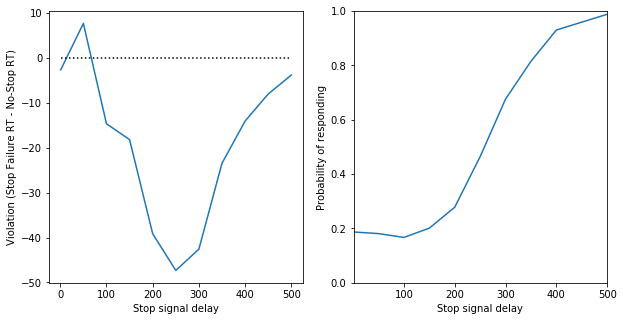

In [133]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(params['ssds'][:11],meanrtgo[:11] - meanrtgo[11])
plt.plot([params['ssds'][0],params['ssds'][10]],[0,0],'k:')
plt.xlabel('Stop signal delay')
plt.ylabel('Violation (Stop Failure RT - No-Stop RT)')
plt.subplot(1,2,2)
plt.plot(params['ssds'][:11],presp[:11])
plt.xlabel('Stop signal delay')
plt.ylabel('Probability of responding')
plt.axis([params['ssds'][0],params['ssds'][10],0,1])


In [33]:
params

{'mugo': 0.1,
 'mustop': 0,
 'threshold': 60,
 'nondecisiongo': 50,
 'nondecisionstop': 50,
 'inhibitionParam': 1,
 'ssds': [1, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 3000],
 'nreps': 1000,
 'maxtime': 1000}

In [48]:
numpy.random.normal(loc=0, scale=1)

-0.6605853315403353

In [140]:
mustopVar

NameError: name 'mustopVar' is not defined

In [141]:
print(mustopsave)

[0.8, 0.8, 0.8, 0.8, 0.8, 0.1, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.1, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.1, 0.8, 0.1, 0.8, 0.8, 0.8, 0.1, 0.8, 0.8, 0.8, 0.8, 0.8, 0.1, 0.8, 0.8, 0.1, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.1, 0.8, 0.8, 0.8, 0.1, 0.1, 0.8, 0.8, 0.8, 0.8, 0.8, 0.1, 0.8, 0.8, 0.8, 0.8, 0.1, 0.8, 0.8, 0.8, 0.8, 0.1, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.1, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.1, 0.1, 0.1, 0.8, 0.8, 0.8, 0.1, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.1, 0.8, 0.8, 0.1, 0.8, 0.8, 0.1, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.1, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.1, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.1, 0.8, 0.8, 0.8, 0.8, 0.1, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.1, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.1, 0.8, 0.8, 0.8, 0.1, 0.8, 0.8, 0.8, 0.1, 0.8, 0.8, 0.8, 0.8,

In [130]:
numpy.mean(stopaccumsave)

457.0135124923274

In [131]:
numpy.median(stopaccumsave)

317.58811835947483